# LOAN DEFAULTS
## Bank has a requirement to avoid risky loans by identifying the possible deffaults based on the historical data.
## Input: income, credit score, loan amount, age, employment age, default (yes\no)

### Load Data

In [30]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import set_config

In [31]:

df = pd.read_csv('../dataset/loan_data.csv')

### get basic information from the ddataset.

In [32]:
print(df.shape)
print(df.columns)

(45000, 14)
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [33]:
print(df.describe())


         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [35]:
### Observations: 
#### 1. Looking at the df.info we noticed that there are no nulls or NaN exists in the dataset.
#### 2. Looking at the df.describe we noticed that there are variations in the scale of the number 
#### type data and this needs to be normalized.
#### 3. df.shape tells us there are 45k rows and 14 features in the dataset.

In [36]:
df_num = df.select_dtypes(include=[np.number])
df_num_col = df_num.columns
print(df_num.shape)

df_cat = df.select_dtypes(exclude=[np.number])
df_cat_col = df_cat.columns
print(df_cat.shape)

(45000, 9)
(45000, 5)


In [37]:
#### Observation: There are 9 numeric and 5 object type features.

#### plot the features to identify skewness and distribution of data

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


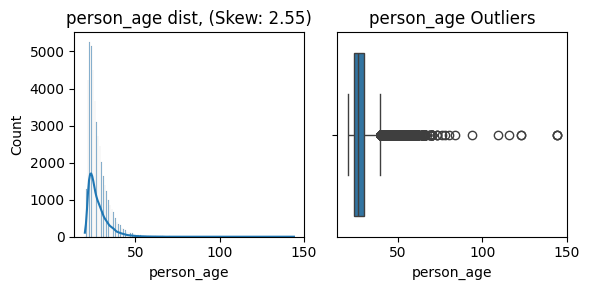

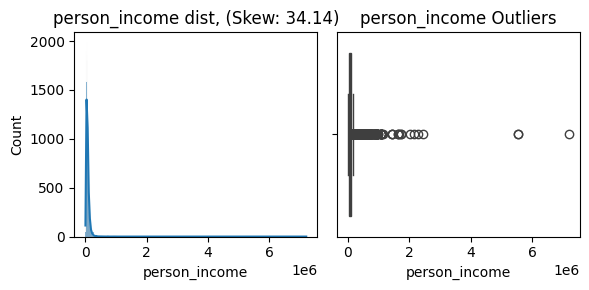

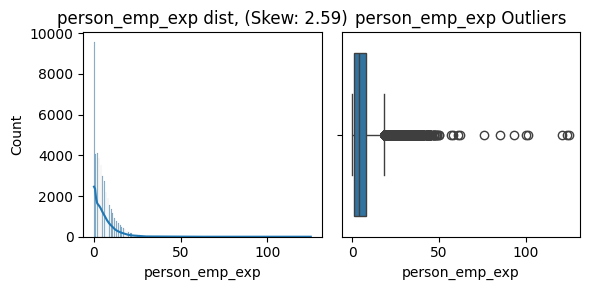

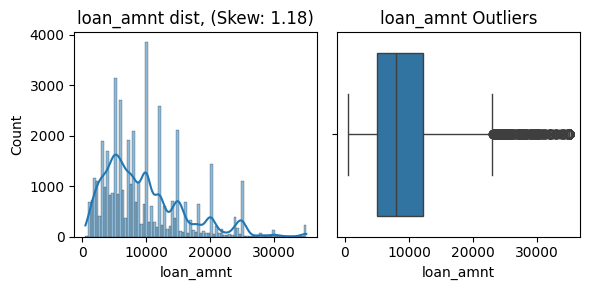

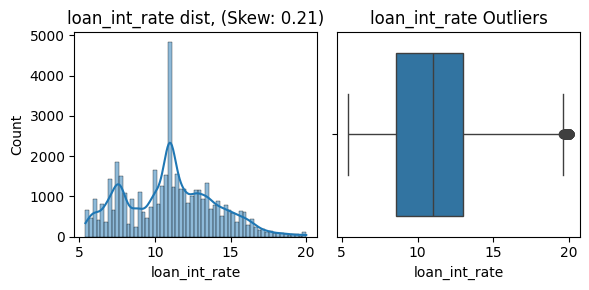

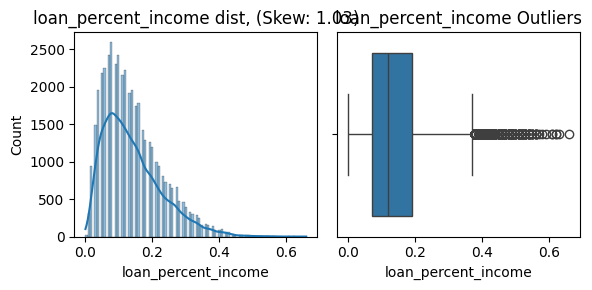

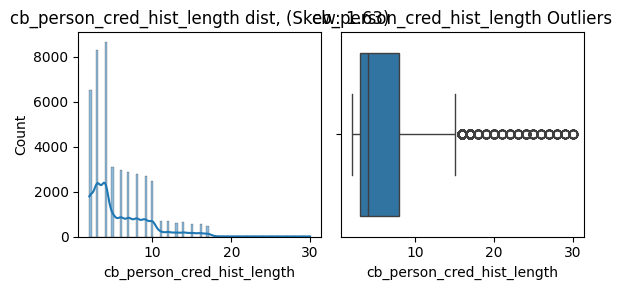

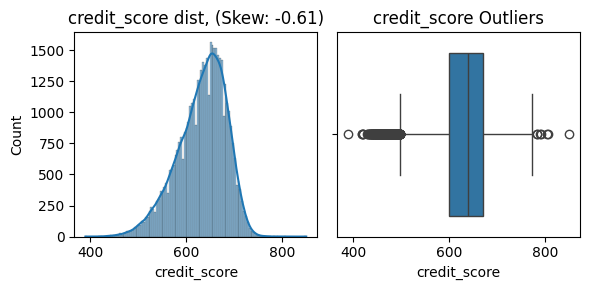

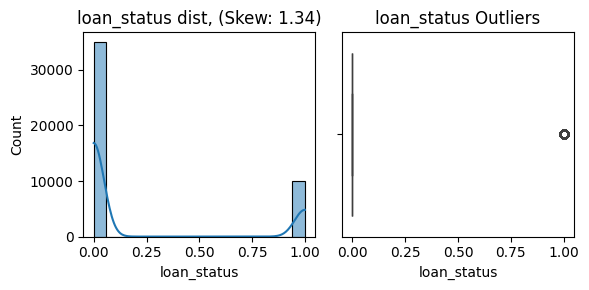

In [38]:


fig_num = 0
print(df_num_col)
for col in df_num_col:
    fig, axis = plt.subplots(1, 2, figsize=(6, 3))
    #plt.figure(fig_num)
    fig_num += 1
    sns.histplot(df_num[col], kde=True, ax=axis[0])
    axis[0].set_title(f"{col} dist, (Skew: {df[col].skew():.2f})")

    #plt.figure(fig_num)
    fig_num += 1
    sns.boxplot(x=df[col], ax=axis[1])
    axis[1].set_title(f'{col} Outliers')
    # Use tight_layout to prevent labels from overlapping
    plt.tight_layout()
    plt.show()


#### Observations:
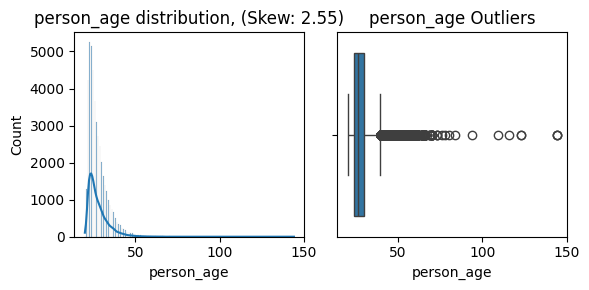
##### 1. Person age has a right skew and there are ouliers which stretch till 150 years of age. Same is showcased in the box plot. We need to handle the extreme age outliers. We need to look at the data with "person age > 70" and take an informed decision if we need to keep the data (use log transform) or cap the data to max. threshold. or simply remove the data.

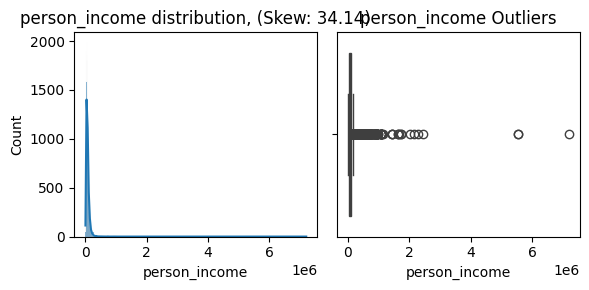
##### 2. Person Income has extreme right skew (with a value of 34+), this is because of the 2 outliers with very high net annual income. As we want to keep the data we will possibally use log transformation to minimize the impact of the extreme right skew.

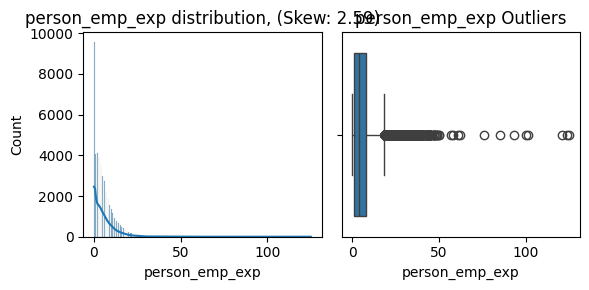
##### 3.Person Employment Experience shows an interesting observation where we notice the maximum number of ppl applying for the loans are young ppl who have less experience. We need to keep the data and possibally perform log transformation to reduce the impact of the skewness.

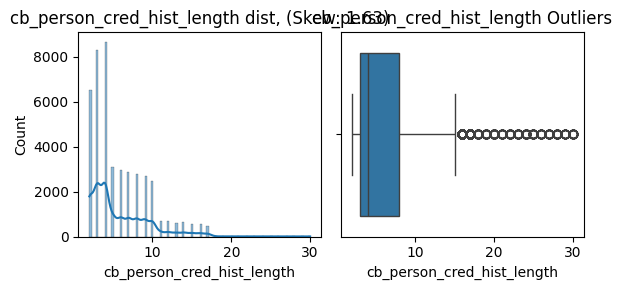
##### 4. person credit history length is heavily skewed (1.64), this needs log transformation.

#### Perform the similar operation on the categorical data. 

C:\Users\anupa\AppData\Local\Temp\ipykernel_27636\303485267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')


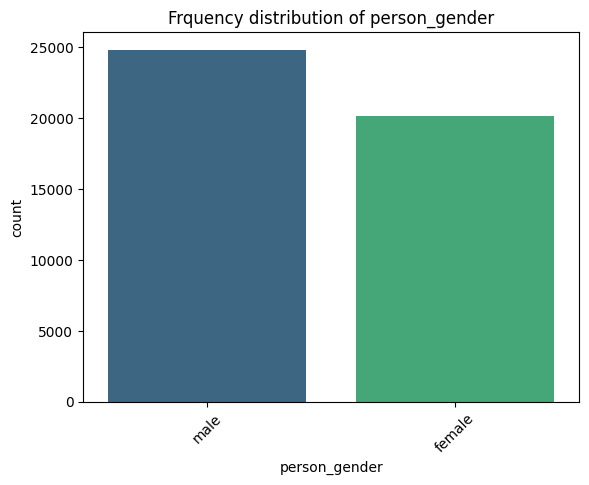

C:\Users\anupa\AppData\Local\Temp\ipykernel_27636\303485267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')


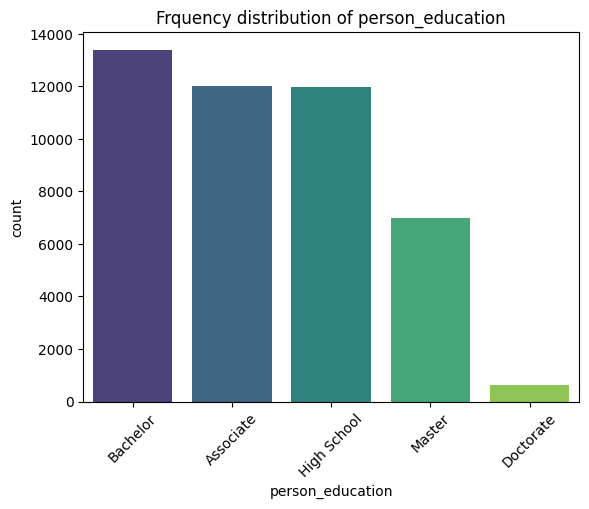

C:\Users\anupa\AppData\Local\Temp\ipykernel_27636\303485267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')


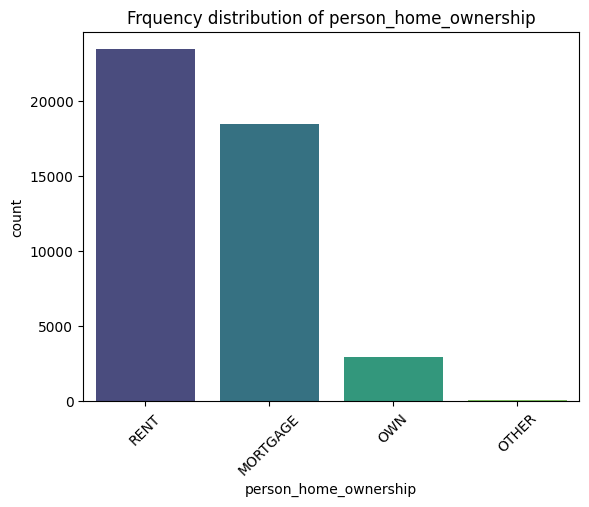

C:\Users\anupa\AppData\Local\Temp\ipykernel_27636\303485267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')


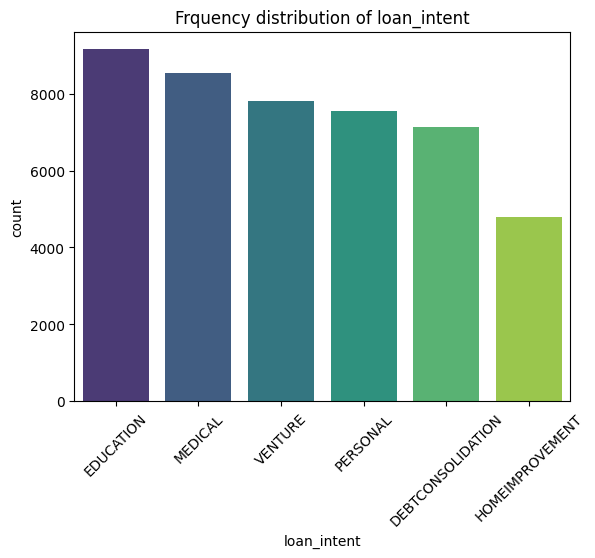

C:\Users\anupa\AppData\Local\Temp\ipykernel_27636\303485267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')


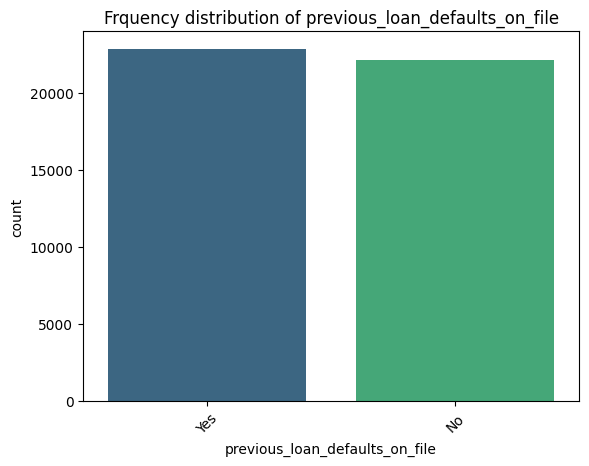

In [39]:
for col in df_cat_col:
    #fig, axis = plt.subplots(1,1, figsize=(8,4))
    sns.countplot(df_cat, x = col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Frquency distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

#### Observations:
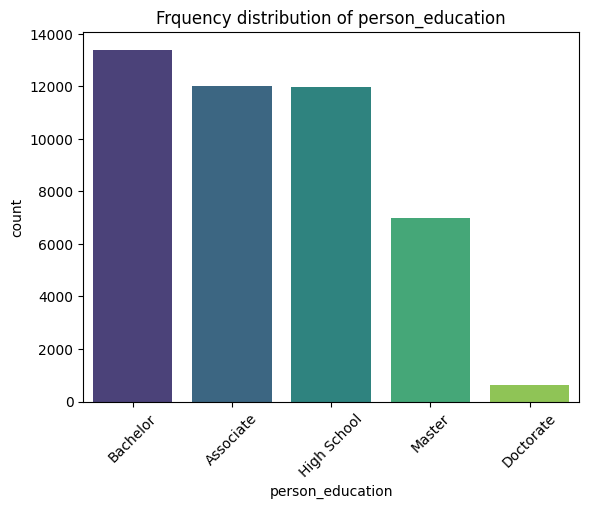
##### 1. Frequency distribution of person's education is tricky as the graph has very less number of ppl with doctorate applying for loans, this needs to be handled : a. we can combine the masters and doctorates to make the graph balanced, b. we can rank them according to the number of years spent study and allocate ranking to make them ordinal type dataset. This needs to be handled because there are too few sample data for "doctorate" loan applicant, learning algorithm will struggle to learn.

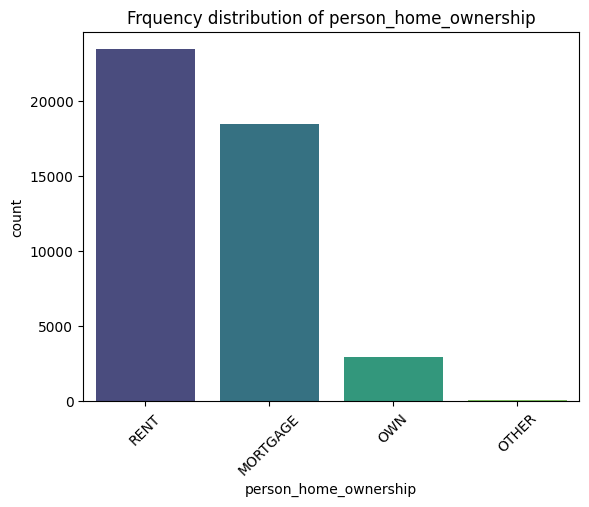
##### 2. Home ownership also has huge problem in terms of bad distribution of data. Minority data for the feature Home ownership (Own and Others) will be overshadowed by Rent and Mortgage. Model may fail to find meaningful pattern for minority.

#### Identify the colinearity and multilinearity

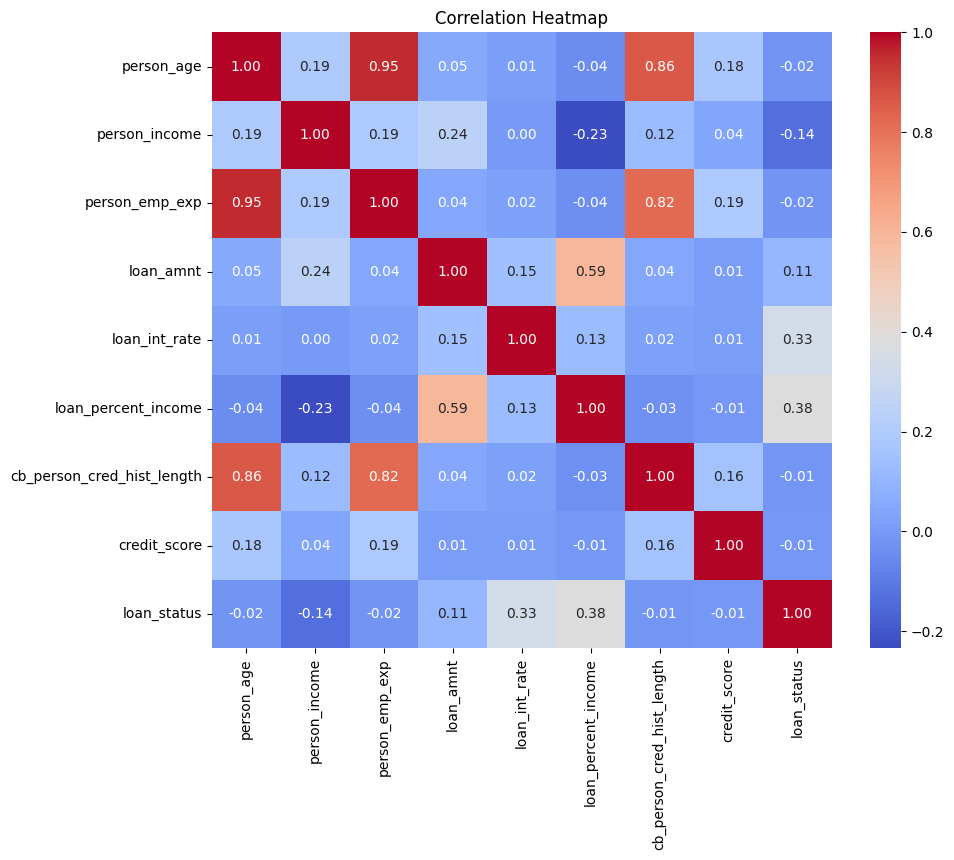

In [40]:
plt.figure(figsize=(10, 8))
# cmap='coolwarm' makes high correlations red and low correlations blue
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Observation: 
##### 1. The correlation map showcases the features that are highly correlated (>0.8) namely: person age, employment age, credit history length, we should either use a single feature instead of 3, or create a feature like credit history length to age ration, or use PCA here.
##### 2. Also, for some reason, credit score is loosely corelated to credit history length, person age and person employment experience only.
##### 3. There are 3 features that are corelated to the target loan_status namely loan amount, loan percent income, loan interest rate. Also, person income is negatively correlated to loan status. i.e. high loan amount, high loan percent income, high interest rrates influences loan default. low income influences loan default

In [41]:
from pandas import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_VIF = add_constant(df_num)
vif_df = DataFrame()
vif_df["feature"] = X_VIF.columns  # type: ignore
vif_df["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]

print(vif_df[vif_df['feature'] != 'const'].sort_values('VIF', ascending=False))

                      feature        VIF
1                  person_age  14.115597
3              person_emp_exp  11.269554
7  cb_person_cred_hist_length   3.926491
6         loan_percent_income   2.358551
4                   loan_amnt   2.120769
2               person_income   1.440332
9                 loan_status   1.355448
5               loan_int_rate   1.151063
8                credit_score   1.036069


#### Observation: VIF (Variance Inflation Factor) :     The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog. For the features with VIF > 5, should be removed.

In [42]:

X_VIF = add_constant(df_num.drop(columns=["person_age", "person_emp_exp"]))
vif_df = DataFrame()
vif_df["feature"] = X_VIF.columns  # type: ignore
vif_df["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(len(X_VIF.columns))]
##### resultant data has low VIF.
print(vif_df[vif_df['feature'] != 'const'].sort_values('VIF', ascending=False))

                      feature       VIF
4         loan_percent_income  2.355692
2                   loan_amnt  2.117371
1               person_income  1.402199
7                 loan_status  1.355287
3               loan_int_rate  1.150731
5  cb_person_cred_hist_length  1.040424
6                credit_score  1.025106


#### Action: 
##### Based on our observation we will be dropping person age and person emp exp from the model dataset for consideration of Model development.
##### Also, we will be performing log transformation for the features cb_person_cred_hist_length,  loan amount and income.
##### 

In [43]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramér's V for two categorical series. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

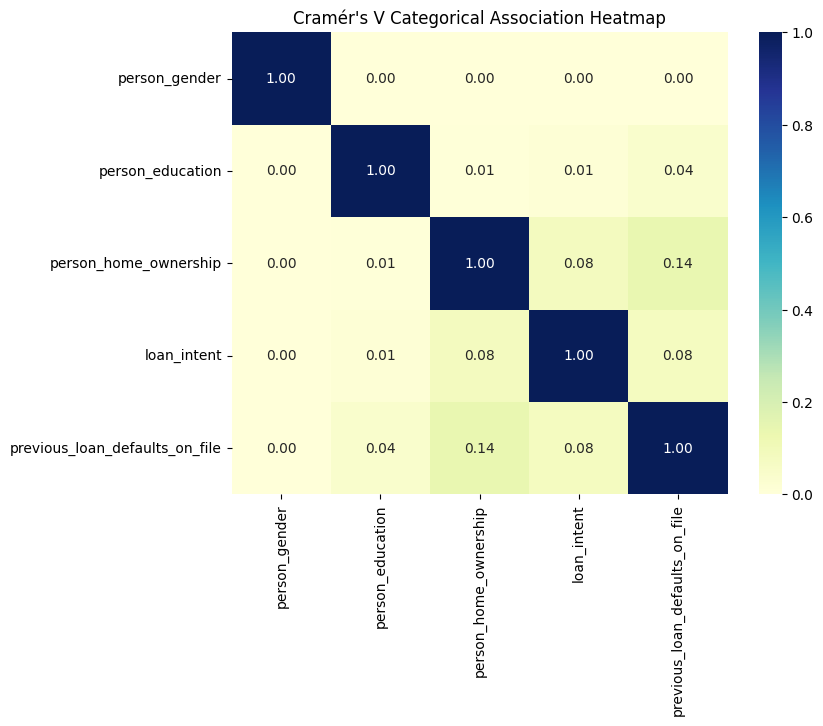

In [44]:
# 1. Identify object columns
obj_cols = df.select_dtypes(include=['object']).columns
rows = []

# 2. Calculate association matrix
for i in obj_cols:
    col = []
    for j in obj_cols:
        col.append(cramers_v(df[i], df[j]))
    rows.append(col)

v_matrix = pd.DataFrame(rows, index=obj_cols, columns=obj_cols)

# 3. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(v_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cramér's V Categorical Association Heatmap")
plt.show()

#### Observation:
##### 1. We used chi_contingency: Chi-square test of independence of variables in a contingency table.This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table [1] observed. The expected frequencies are computed based on the marginal sums under the assumption of independence. we use cramer's V heatmap, we first need to calculate the association between every pair of categorical columns. Cramér's V is a measure of association between two nominal variables, giving a value between 0 (no association) and 1 (perfect association). looking at the heatmap we noticed that none of the enteries are associated.



In [45]:
for i in df_cat_col: 
    print(df[i].nunique())

2
5
4
6
2


##### In case nunique > 10, use "target encoding" else use one hot encoding.

  person_gender  loan_status
0        female     0.222481
1          male     0.222012


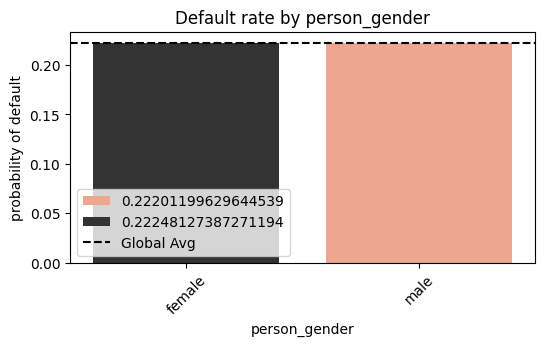

  person_education  loan_status
0        Doctorate     0.228663
1         Bachelor     0.225241
2      High School     0.223104
3        Associate     0.220319
4           Master     0.217622


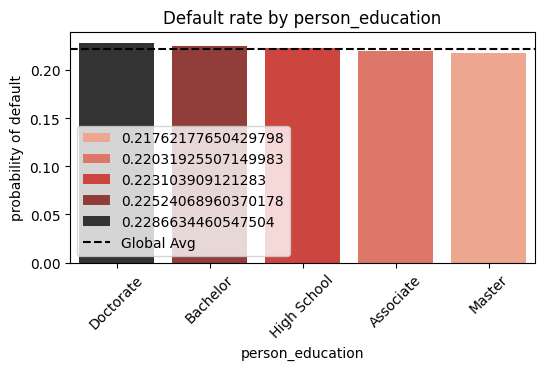

  person_home_ownership  loan_status
0                 OTHER     0.333333
1                  RENT     0.323977
2              MORTGAGE     0.115961
3                   OWN     0.075229


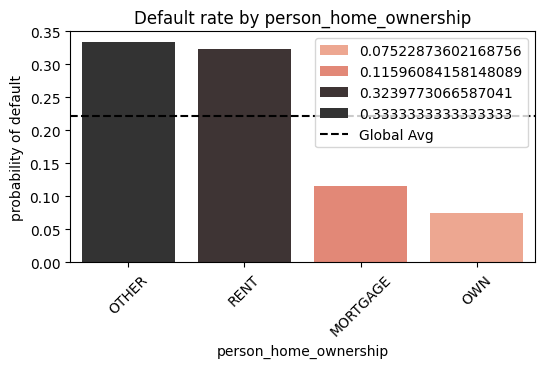

         loan_intent  loan_status
0  DEBTCONSOLIDATION     0.302729
1            MEDICAL     0.278194
2    HOMEIMPROVEMENT     0.263015
3           PERSONAL     0.201404
4          EDUCATION     0.169562
5            VENTURE     0.144264


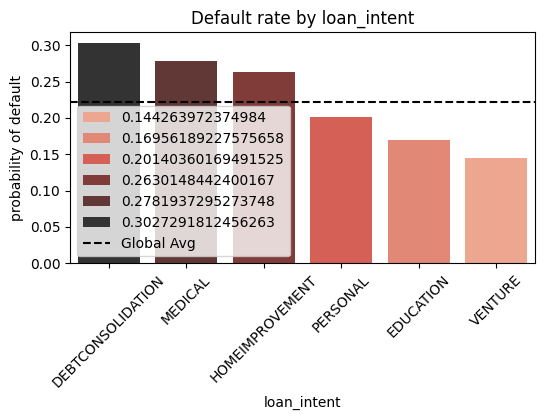

  previous_loan_defaults_on_file  loan_status
0                             No      0.45163
1                            Yes      0.00000


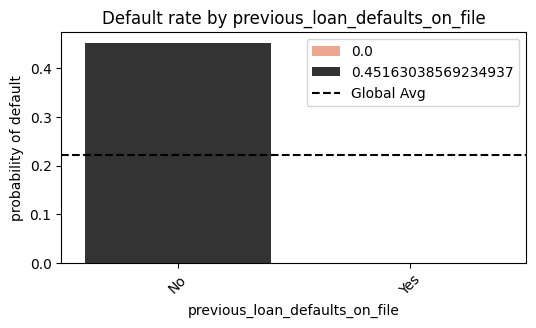

In [46]:
from matplotlib.lines import lineStyles


for i in df_cat_col:
    fig, axis = plt.subplots(1, 1, figsize=(6, 3))
    target_mean = df.groupby(i)['loan_status'].mean().sort_values(ascending=False).reset_index()
    print(target_mean)
    sns.barplot(data=target_mean, x=i, y='loan_status', palette='Reds_d', hue='loan_status')

    plt.axhline(df['loan_status'].mean(), color='black', linestyle='--', label='Global Avg')

    plt.title(f"Default rate by {i}")
    plt.ylabel(f"probability of default")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

#### Observation : we are using "Target Mean Plot" that visualizes the relationship between a categorical feature and target variable (loan_status).
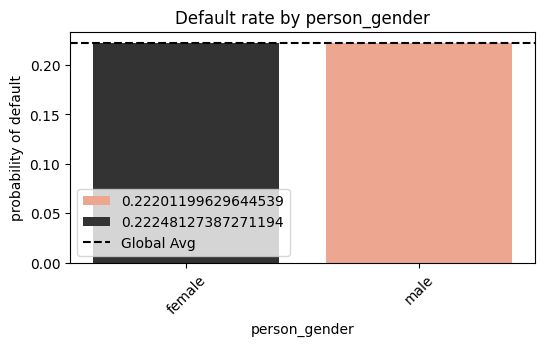
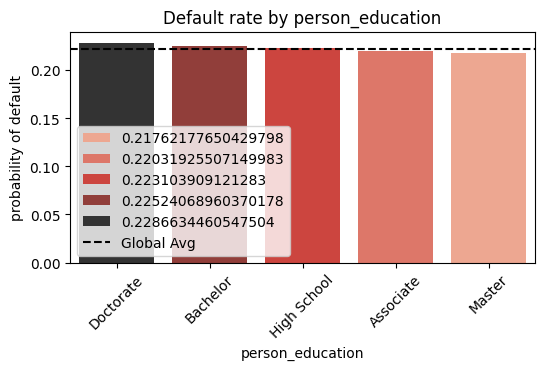
##### 1. For Person gender we can see that the global everage is equal to the Male and Female means (22 %), hence the gender is not a strong discriminator for loan defaults. Same applies to person education.
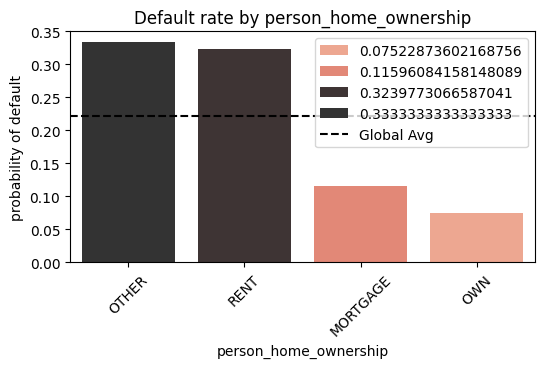
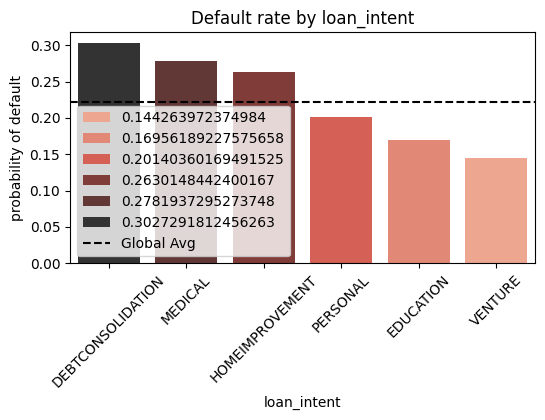
##### 2. For Loan Intenet and Home Ownership, we notice there is a significant variance in the default loan, for Home ownership we can see there is a high chance of defaulting for loans where applicant is on rent or other (although other is very small percentage) and mortgage and own home applicants have a lower chance of defaulting. similarly, Debt consolidation, Medical and home improvement seems to be risky loan intenets and education, personal and venture seems to be compareatively less risky loans.
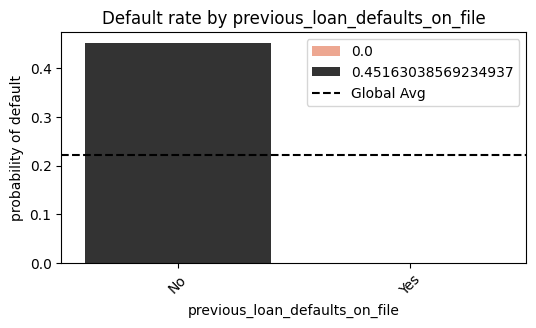
##### 3. For previous loans default on file, it seems the posibility of loan default is 45% and hence it is clearly a strict check for flaging loan application.

#### Action:
##### Based on our analysis we will be dropping Person Gender and Person Education from the DataFrame consideration for Model development.
##### Merge Rent and Other as both have high loan default rates. and other on its own has very few records.


In [47]:
print(df.columns)

data = df.drop(columns=['person_age', 'person_gender', 'person_education', 'person_emp_exp' ])

print(data.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler

set_config(transform_output="pandas")

# Group "OTHER" into "RENT" for home ownership
data['person_home_ownership'] = data['person_home_ownership'].replace('OTHER', 'RENT')

X = data.drop(columns=['loan_status'])
y = data['loan_status']

data_number_cols = X.select_dtypes(include=[np.number]).columns.tolist()


log1p_pipeline = FunctionTransformer(np.log1p, validate=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), data_number_cols),
        ('log', log1p_pipeline, ['person_income', 'loan_amnt', 'cb_person_cred_hist_length']),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), 
            ['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])
    ],
    remainder='passthrough'
)

# Final Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [103]:


Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state = 42)
print(type(Xtrain))
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

Xtrain_processed = preprocessor.fit_transform(Xtrain)
Xtest_processed = preprocessor.fit_transform(Xtest)

model.fit(Xtrain_processed, Ytrain)

Ypred = model.predict(Xtest_processed)

<class 'pandas.core.frame.DataFrame'>


c:\projects\ai-ml-workspace\venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:318: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))
c:\projects\ai-ml-workspace\venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:318: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


0.8971111111111111
0.7472636815920398
0.7643765903307888
[[6572  418]
 [ 508 1502]]


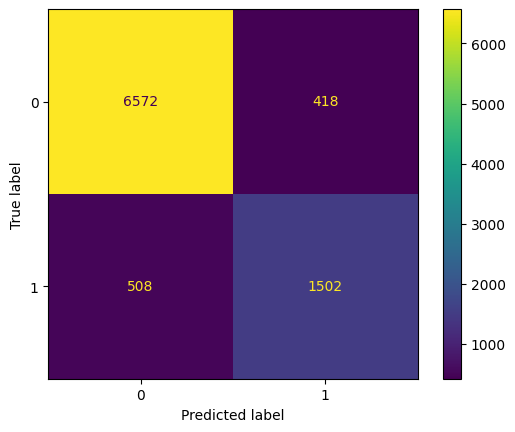

In [104]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

a_score = accuracy_score(Ytest, Ypred)
print(a_score)
r_score = recall_score(Ytest, Ypred)
print(r_score)
f_score = f1_score(Ytest, Ypred)
print(f_score)
cm = confusion_matrix(Ytest, Ypred)
print(cm)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()
plt.show()


In [105]:
from tifffile import astype
from sklearn.metrics import precision_score

p = model.predict_proba(Xtest_processed)[:, 1]
#print(Ypred_prob)
rows = []
threshold = [0.75, 0.7, 0.6, 0.5, 0.3, 0.25, 0.20]
for t in threshold:
    y_pred = (p >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(Ytest, y_pred).ravel()
    prec = precision_score(Ytest, y_pred, zero_division=0)
    rec  = recall_score(Ytest, y_pred, zero_division=0)
    rows.append((t, tp, fp, fn, tn, prec, rec))

print("t   TP  FP  FN  TN  prec  recall")
for r in rows:
    print(f"{r[0]:.2f} {r[1]} {r[2]} {r[3]} {r[4]} {r[5]:.3f} {r[6]:.3f}")



t   TP  FP  FN  TN  prec  recall
0.75 990 103 1020 6887 0.906 0.493
0.70 1116 151 894 6839 0.881 0.555
0.60 1333 279 677 6711 0.827 0.663
0.50 1502 418 508 6572 0.782 0.747
0.30 1755 817 255 6173 0.682 0.873
0.25 1809 963 201 6027 0.653 0.900
0.20 1858 1115 152 5875 0.625 0.924


##### Add penalty and use GridSearchCV to identify the optimal 
Regularization (L1/L2/ElasticNet) mainly controls:
overfitting
coefficient stability
noise sensitivity

It usually does not add expressiveness (it won’t suddenly learn nonlinear rules).
But it can help if:
your features are correlated,
coefficients are unstable,
probabilities are poorly calibrated due to noise.

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# 1) Grid-search only regularization strength
param_grid = {
    "C":  [0.1, 1, 10],
    "penalty": ["elasticnet"],
   # "solver": ["lbfgs"],
   "solver": ["saga"],
    "max_iter": [2000],
    "l1_ratio":[0.5]
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    scoring="recall",   # prioritize catching defaulters
    cv=5,
)
model.fit(Xtrain_processed, Ytrain)

grid.fit(Xtrain_processed, Ytrain)
best_lr = grid.best_estimator_

# 2) Evaluate at YOUR policy threshold
t = 0.25
p = best_lr.predict_proba(Xtest_processed)[:, 1]
y_pred = (p >= t).astype(int)

tn, fp, fn, tp = confusion_matrix(Ytest, y_pred).ravel()
prec = precision_score(Ytest, y_pred, zero_division=0)
rec  = recall_score(Ytest, y_pred, zero_division=0)

print("Best params:", grid.best_params_)
print(f"t={t}  TP={tp} FP={fp} FN={fn} TN={tn}  prec={prec:.3f} recall={rec:.3f}")

Best params: {'C': 10, 'l1_ratio': 0.5, 'max_iter': 2000, 'penalty': 'elasticnet', 'solver': 'saga'}
t=0.25  TP=1811 FP=977 FN=199 TN=6013  prec=0.650 recall=0.901
